In [ ]:
!pip install shap

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import tensorflow as tf
from openpyxl.drawing.image import Image
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from openpyxl import Workbook

In [27]:
epochs = 128

# Leer el archivo CSV con pandas
data = pd.read_excel("p2_serie_de_tiempo.xlsx")

data = data.drop(['Fecha','Dia_sem','fest'], axis=1)
data.head()

,Unnamed: 0,Horas,Agno,Mes,Dia_mes,20,21,22,23,24,...,58,59,60,61,62,64,65,66,67,68
0,1,6,2015,1,1,76.967742,65.548387,59.419355,60.258065,78.338710,...,64.645161,46.612903,89.967742,83.451613,90.645161,85.838710,85.612903,88.258065,85.709677,85.096774
1,2,7,2015,1,1,70.451613,66.467742,35.903226,48.403226,50.145161,...,56.661290,48.806452,75.209677,79.758065,68.161290,83.096774,81.048387,78.370968,73.306452,70.129032
2,3,8,2015,1,1,77.903226,47.193548,26.451613,33.419355,39.629032,...,59.000000,46.709677,72.741935,71.161290,65.096774,81.870968,79.225806,77.000000,70.419355,56.548387
3,4,9,2015,1,1,70.806452,48.338710,32.693548,43.193548,59.338710,...,54.758065,49.000000,75.612903,78.741935,79.419355,84.741935,80.419355,83.516129,75.741935,65.774194
4,5,10,2015,1,1,68.451613,50.924731,25.129032,44.516129,52.150538,...,50.473118,55.290323,75.645161,81.612903,75.064516,85.870968,80.838710,83.709677,77.677419,66.322581


In [28]:
# Separar los datos en variables de entrada (X) y salida (y)
X = data.iloc[:, 0:5].values
y = data.iloc[:, 5:50].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
print('X shape:', X.shape)

X shape: (7308, 5)


In [31]:
print('y shape:', y.shape)

y shape: (7308, 44)


In [32]:
# Definir el modelo de red neuronal feedforward
model = Sequential()
model.add(Dense(44, activation='relu',input_shape=(5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(44))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 44)                264       
                                                                 
 dense_9 (Dense)             (None, 64)                2880      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 44)                2860      
                                                                 
Total params: 10,164
Trainable params: 10,164
Non-trainable params: 0
_________________________________________________________________


In [34]:
X_train[0]

array([ 614,   17, 2015,    3,    3])

In [35]:
y_train[0]

array([73.5, 60. , 35. , 60. , 63. , 82. , 77.5, 76.5, 81.5, 83.5, 82. ,
       78.5, 70. , 72. , 66.5, 64.5, 77. , 66.5, 73.5, 79.5, 54. , 72. ,
       68.5, 81. , 65.5, 54. , 46.5, 57.5, 53.5, 52. , 62.5, 70.5, 74.5,
       61. , 40.5, 50.5, 70. , 70. , 72. , 84. , 69. , 72. , 63. , 52. ])

In [36]:
len(X_train[0])

5

In [37]:
len(y_train[0])

44

In [38]:
history = model.fit(X_train, y_train, epochs=128, validation_data=(X_test, y_test))


Epoch 1/128
160/160 [==============================] - 2s 4ms/step - loss: 4450.5825 - mae: 30.2147 - val_loss: 247.5209 - val_mae: 11.9353
Epoch 2/128
160/160 [==============================] - 0s 3ms/step - loss: 227.1175 - mae: 11.4154 - val_loss: 216.6572 - val_mae: 10.9928
Epoch 3/128
160/160 [==============================] - 1s 3ms/step - loss: 213.2373 - mae: 10.9853 - val_loss: 210.6699 - val_mae: 11.0606
Epoch 4/128
160/160 [==============================] - 0s 3ms/step - loss: 209.8580 - mae: 10.8823 - val_loss: 208.7670 - val_mae: 10.6317
Epoch 5/128
160/160 [==============================] - 1s 3ms/step - loss: 208.8150 - mae: 10.8413 - val_loss: 211.4032 - val_mae: 11.0618
Epoch 6/128
160/160 [==============================] - 0s 3ms/step - loss: 207.5821 - mae: 10.8021 - val_loss: 216.1487 - val_mae: 11.4560
Epoch 7/128
160/160 [==============================] - 1s 5ms/step - loss: 208.0751 - mae: 10.8383 - val_loss: 207.6567 - val_mae: 10.6991
Epoch 8/128
160/160 [=====

In [39]:
prediccion = model.predict(X_test)

69/69 [==============================] - 0s 1ms/step


In [40]:
print(prediccion)

[[70.26069  51.535362 28.041933 ... 74.67363  75.35979  61.203815]
 [67.35373  52.07922  33.881645 ... 67.3449   65.58841  60.882336]
 [65.10648  41.345604 28.459757 ... 60.83564  61.601635 50.25177 ]
 ...
 [73.307365 55.152664 29.746462 ... 78.99764  76.60194  64.0253  ]
 [72.08293  53.215897 30.375717 ... 79.60299  75.885155 67.63409 ]
 [73.34859  62.73675  34.743534 ... 70.63724  68.5251   67.31865 ]]


In [41]:
input_data = np.array([[614,17, 2015, 3, 3]])
prediccion1 = model.predict(input_data)

1/1 [==============================] - 0s 28ms/step


In [42]:
print(prediccion1)

[[68.24657  49.50521  33.096592 48.87284  56.802597 71.01618  74.48391
  71.20897  75.81591  72.99526  72.926575 74.25571  76.013306 75.714676
  70.357925 74.4789   75.82267  74.71396  74.96948  75.55543  65.64613
  68.78454  70.68407  60.495747 63.42893  56.244034 48.316685 43.820854
  43.158123 42.452316 61.00307  67.01176  65.30538  61.589767 38.14284
  39.72446  57.178337 66.58909  69.21378  71.33589  70.048256 71.07589
  69.326836 55.45715 ]]


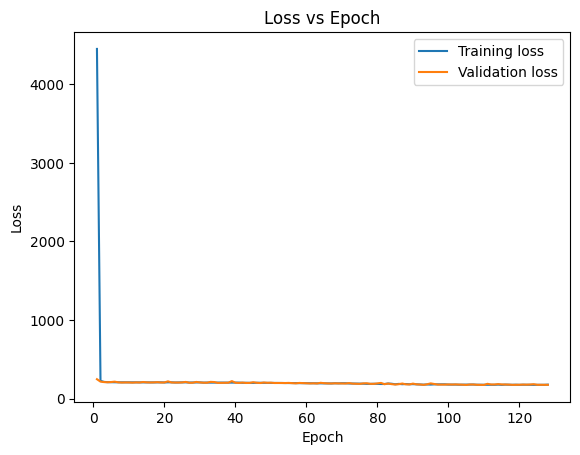

In [43]:
# Graficar los valores de epoch vs loss y guardar la imagen
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig("loss_vs_epoch.png")
plt.show()


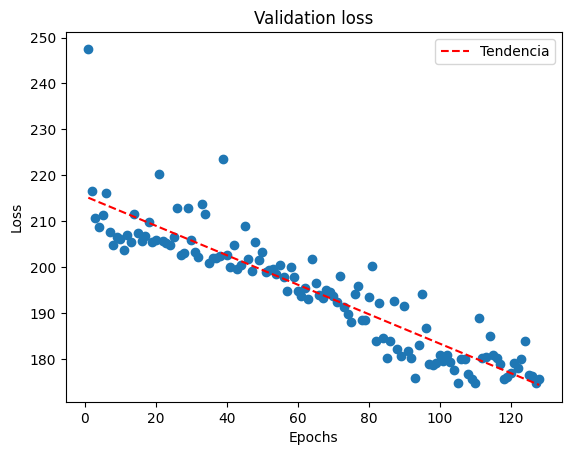

In [44]:
# Graficar la pérdida de entrenamiento y validación a lo largo de las épocas
history_dict = history.history
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, val_loss_values, linestyle='none', marker='o')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Ajustar una línea de tendencia y graficarla
z = np.polyfit(epochs, val_loss_values, 1)
p = np.poly1d(z)
plt.plot(epochs, p(epochs), "r--", label="Tendencia")

# Mostrar leyenda y guardar imagen
plt.legend()
plt.savefig("error_de_validacion.png")
plt.show()

plt.show()


In [ ]:
# Crear el archivo Excel y escribir las cabeceras de las columnas en la primera hoja
book = Workbook()
sheet1 = book.active
sheet1.title = "infomacion"
sheet1['A1'] = 'Epoch'
sheet1['B1'] = 'Loss'
sheet1['C1'] = 'MSE'
# Escribir los valores de epoch, loss y val_mse en la primera hoja del archivo Excel
for i, (loss, mse) in enumerate(zip(history.history['loss'], history.history['val_mae'])):
    sheet1['A{}'.format(i+2)] = i+1
    sheet1['B{}'.format(i+2)] = loss
    sheet1['C{}'.format(i+2)] = mse

# Guardar los valores de las predicciones en la segunda hoja del archivo Excel
sheet2 = book.create_sheet("valores_predicciones")
sheet2['A1'] = 'Prediccion 1'
sheet2['B1'] = 'Predicciones TOTALES'
for i, (pred1, pred2) in enumerate(zip(prediccion1[0], prediccion)):
    sheet2['A{}'.format(i+2)] = str(pred1)
    sheet2['B{}'.format(i+2)] = ', '.join(str(x) for x in pred2)

# Cargar las imágenes de los archivos
loss_vs_epoch = openpyxl.drawing.image.Image('loss_vs_epoch.png')
error_de_validacion = openpyxl.drawing.image.Image('error_de_validacion.png')

# Añadir las imágenes a la hoja de gráficos
sheet1.add_image(loss_vs_epoch, 'E1')
sheet1.add_image(error_de_validacion, 'P1')

# Guardar el archivo Excel
book.save("modelo.xlsx")